**Gambler's Problem**

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips.
*  If the coin comes up heads, he wins as many dollar as he has staked on that flip; 
*   if it is tails, he loses
his stake.
* The game ends when the gambler wins by reaching his goal of $100, or loses by running out of money.
*On each flip, the gambler must decide what
portion of his capital to stake, in integer numbers
of dollars. 

The state is the gambler's capital s = {0,1,2,3…,100}

The actions are stakes a = {1, 2, …, min(s,100-s)}

The reward is zero on all transitions except those on
which the gambler reaches his goal, when it is +1.

Let p_h denote the probability of the
coin coming up heads

The state-value function then gives the probability of
winning from each state.

A policy is a mapping from levels of capital to stakes.
The optimal policy maximizes the
probability of reaching the goal.

. 

**Pseudocode**

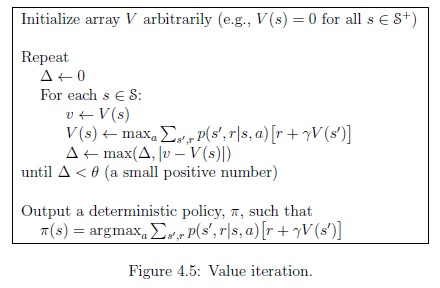

**Expected Output**
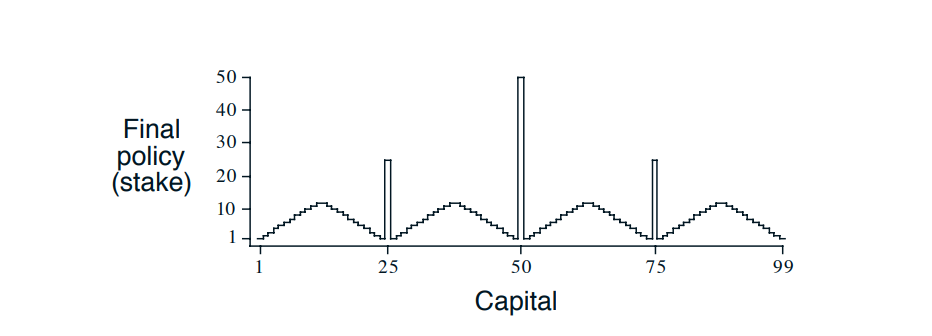

**Explanation of Expected Output**

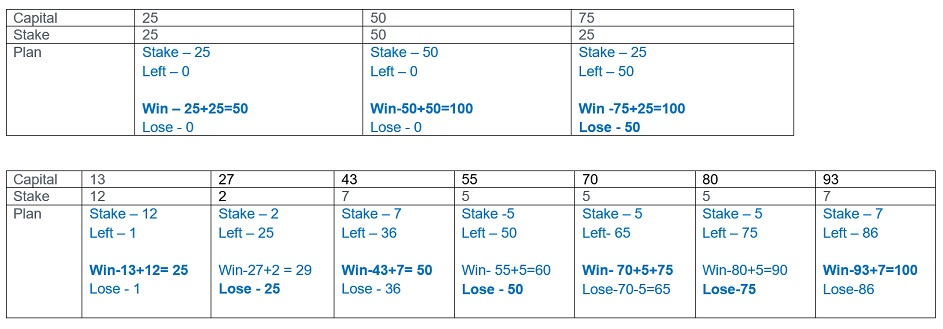

**Implementation**

In [ ]:
import numpy as np
import sys
import matplotlib.pyplot as plt

In [ ]:
#Implement Value Iteration

def value_iteration_for_gambler(p_h, theta=0.0001, discount_factor=1.0):
  rewards = np.zeros(101)
  rewards[100] = 1
  V = np.zeros(101)

  def one_step_lookahead(s, V, rewards):
    A = np.zeros(101)
    for a in range(1, min(s, 100-s)+1):
      A[a] = p_h* (rewards[s+a]+V[s+a]*discount_factor) + (1-p_h)* (rewards[s-a]+V[s-a]*discount_factor)
    return A
  

  while True:
    delta = 0

    for s in range(1,100):
      best_action_value = V[s]
      V[s] = np.max(one_step_lookahead(s, V, rewards))
      delta = max(delta , np.abs(best_action_value-V[s]))
      

In [ ]:
policy, v = value_iteration_for_gamblers(0.25)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

Optimized Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 15. 16. 17.
 18.  6. 20. 21.  3. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 11. 10.  9. 42.  7. 44.  5. 46. 47. 48. 49. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 10.  9. 17.  7. 19.  5. 21.
 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]

Optimized Value Function:
[0.00000000e+00 7.24792480e-05 2.89916992e-04 6.95257448e-04
 1.16010383e-03 1.76906586e-03 2.78102979e-03 4.03504074e-03
 4.66214120e-03 5.59997559e-03 7.08471239e-03 9.03964043e-03
 1.11241192e-02 1.56793594e-02 1.61464431e-02 1.69517994e-02
 1.86512806e-02 1.98249817e-02 2.24047303e-02 2.73845196e-02
 2.83388495e-02 3.04937363e-02 3.61633897e-02 3.84953022e-02
 4.44964767e-02 6.25000000e-02 6.27174377e-02 6.33700779e-02
 6.45857723e-02 6.59966059e-02 6.78135343e-02 7.08430894e-02
 7.46098323e-02 7.64884604e-02 7.93035477e-02 8.37541372e-02

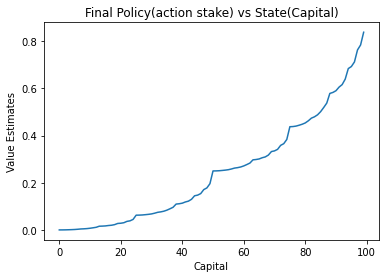

In [ ]:
# Plotting Final Policy (action stake) vs State (Capital)
# The graph shows the value function found by successive sweeps of value iteration

plt.title('Final Policy(action stake) vs State(Capital)')   # title to the graph
plt.xlabel('Capital')          # naming the x axis
plt.ylabel('Value Estimates')  # naming the y axis

x = range(100)                # x axis values
y = v[:100]                   # y axis values
 
plt.plot(x, y)                # plotting the points 
 
plt.show()     # function to show the plot

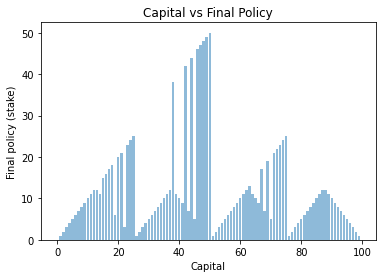

In [ ]:
# Plotting Capital vs Final Policy
# The graph shows the Final Policy

plt.title('Capital vs Final Policy')  # title to the graph
plt.xlabel('Capital')                 # naming the x axis
plt.ylabel('Final policy (stake)')    # naming the y axis

x = range(100)    # x axis values
y = policy        # y axis values

plt.bar(x, y, align='center', alpha=0.5)  # plotting the bars

plt.show()  # function to show the plot